## Исследование данных о российском кинопрокате



**Цель исследования:**
- выявление трендов на рынке российского кинопроката.

**Задачи исследования:**
- исследование данных;
- выявление интереса зрителей к фильмам, которые получили государственную поддержку;
- поиск иных закономерностей в данных.

**Ход исследования:**
1. [предобработка](#preprocessing);
2. [проведение исследовательского анализа данных](#analysis):
- изучение количества фильмов, выходящих каждый год;
- изучение динамики проката по годам;
- изучение кассовых сборов по годам;
3. [исследование фильмов, которые получили государственную поддержку](#support);
4. [общий вывод](#conclusion).

1. [Предобработка](#preprocessing)

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
# Импорт необходимых библиотек

import pandas as pd

In [3]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
# Проверка таблицы mkrf_movies

mkrf_movies.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
# Проверка таблицы mkrf_shows

mkrf_shows.head(5)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [6]:
# Проверка разнерности таблицы mkrf_shows

mkrf_shows.shape[0]

3158

In [7]:
# Проверка разнерности таблицы mkrf_movies

mkrf_movies.shape[0]

7486

In [8]:
# Общая информация по таблице mkrf_movies

mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
# Общая информация по таблице mkrf_shows

mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблицы mkrf_shows и mkrf_movies будут в дальнейшем объединены по столбцу 'puNumber'. Для этого необходимо привести столбец mkrf_movies['puNumber'] к типу int. Сразу преобразование выполнить не удалось, т. к.  в столбце с заведомо количественными значениями оказалась строка.
Проверка показала, что такая строка - единственная, было решено заменить ее на значение 0.

In [10]:
# Проверка mkrf_movies['puNumber'].

mkrf_movies.query('puNumber=="нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Замена значения в столбце mkrf_movies['puNumber'].

mkrf_movies.loc[mkrf_movies['puNumber']=='нет', 'puNumber'] = 0

In [12]:
# Преобразование столбца mkrf_movies['puNumber'].

mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

In [13]:
# Объединение таблиц mkrf_movies и mkrf_shows

movies_join = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [14]:
# Общая информация по таблице movies_join

movies_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В таблицу movies_join вошло 7486 значений, что соответствует количеству строк в таблице mkrf_movies. Мы можем предположить, что объединение прошло корректно, в новую значению вошли все значения из столбца mkrf_movies и не возникли дубликаты.

In [15]:
# Подсчет пропущенных значений.

movies_join.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

К пропущенным значениям мы вернемся на следующем шаге.

Мы объединили таблицы mkrf_movies и mkrf_shows в таблицу movies_join. Объеднение было выполнено по номеру прокатного удостоверения (столбцу ['puNumber']). В новую таблицу вошло 7486 строк.

Так же было выполнено столбца mkrf_movies['puNumber'] - из типа object в тип int.

<a id="preprocessing"> </a>
### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

На предыдущем этапе было выполнено преобразование столбца mkrf_movies['puNumber'] - из типа object в тип int.


In [16]:
movies_join['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Для преобразования столбца movies_join['ratings'] необходимо изменить значение оценки в процентах на значение по десятибальной шкале.

In [17]:
# Первоначальный вариант замены

#movies_join.loc[movies_join['ratings']=='99%', 'ratings'] = '9.9'
#movies_join.loc[movies_join['ratings']=='28%', 'ratings'] = '2.8'
#movies_join.loc[movies_join['ratings']=='97%', 'ratings'] = '9.7'
#movies_join.loc[movies_join['ratings']=='83%', 'ratings'] = '8.3'
#movies_join.loc[movies_join['ratings']=='64%', 'ratings'] = '6.4'
#movies_join.loc[movies_join['ratings']=='91%', 'ratings'] = '9.1'
#movies_join.loc[movies_join['ratings']=='94%', 'ratings'] = '9.4'
#movies_join.loc[movies_join['ratings']=='62%', 'ratings'] = '6.2'
#movies_join.loc[movies_join['ratings']=='19%', 'ratings'] = '1.9'
#movies_join.loc[movies_join['ratings']=='88%', 'ratings'] = '8.8'
#movies_join.loc[movies_join['ratings']=='89%', 'ratings'] = '8.9'
#movies_join.loc[movies_join['ratings']=='98%', 'ratings'] = '9.8'
#movies_join.loc[movies_join['ratings']=='79%', 'ratings'] = '7.9'
#movies_join.loc[movies_join['ratings']=='90%', 'ratings'] = '9.0'

In [18]:
# Второй вариант замены
movies_join['ratings'] = movies_join['ratings'].str.strip('%').astype('float')

In [19]:
movies_join.loc[movies_join['ratings']>10, 'ratings'] = float('nan')

In [20]:
movies_join['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [21]:
movies_join.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [22]:
movies_join.query('production_country.isna()==True')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [23]:
movies_join.loc[movies_join['puNumber']==111001216, 'production_country'] = 'Россия'
movies_join.loc[movies_join['puNumber']==214000410, 'production_country'] = 'Россия'

In [24]:
movies_join.query('film_studio.isna()==True')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03T12:00:00.000Z,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10T12:00:00.000Z,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01T12:00:00.000Z,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15T12:00:00.000Z,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05T12:00:00.000Z,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05T12:00:00.000Z,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06T12:00:00.000Z,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ручная проверка показала, что:
- либо у Кинопоиска нет информации о студии (большая часть фильмов без студии - короткометражки),
- либо у Кинопоиска нет информации о фильме.

Но удаление этих строк считаю нецелессообразным.

In [25]:
movies_join.loc[movies_join['puNumber']==214000410, 'film_studio'] = 'Concept Space / Prostranstvo Idey'
movies_join.loc[movies_join['puNumber']==111013818, 'film_studio'] = 'Pravda Films'
movies_join.loc[movies_join['puNumber']==111013818, 'film_studio'] = 'Biscuit Pictures, Contemptible, Mission Filmworks'

In [26]:
movies_join.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                16
production_country          0
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Логически мы не сможем заполнить пропуски в столбцах:
- refundable_support, nonrefundable_support, budget, financing_source - более 95 % пропусков;
- box_office - ~58 % пропусков;
- ratings, genres - ~13 % пропусков. 

Необходимо запросить дополнительные данные.

Пропуски в столбцах director и producer могут не быть "пропусками" в том смысле, который мы вкладываем в это слово. 

Цитируем википедию:
"Продю́сер (англ. producer, от produce — производить) в кинематографе — доверенное лицо кинокомпании, осуществляющее идейно-художественный и организационно-финансовый контроль над постановкой фильма. Он также принимает активное участие в подборе актёров, технического персонала. Функции продюсера могут выполнять также режиссёры, актёры, сценаристы."

И еще раз википедия: "Работа режиссёра в каждом виде искусства имеет свои особенности и не во всех случаях ему принадлежит главная роль: так, балет ставит прежде всего балетмейстер, а в оперном театре интерпретатором музыкально-драматического произведения является дирижёр."

Пропуски в столбцах producer и director могут быть объяснены типов художественного произведения и неоднозначным функционалом продюссера и режиссера.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [27]:
print(movies_join.duplicated().sum())

0


In [28]:
movies_join = movies_join.drop_duplicates()

Возможные причины появления дубликатов - неправильный выбор типа соединения двух таблиц и человеческая ошибка - внесение в базу одного номера прокатного удостоверения на несколько разных видов показа.

Согласно текущему Постановлению прокатное удостоверение выдается на три вида показа фильма: 
- показ фильма в кинозале;
- прокат фильма на материальном носителе;
- показ фильма другими техническими способами. 

Получить удостоверение можно на один или сразу на несколько способов показа.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [29]:
# Преобразование данных в столбцах 'genres' и 'production_country'

movies_join['genres'] = movies_join['genres'].str.replace(',', ', ')
movies_join['production_country'] = movies_join['production_country'].str.replace(' - ', '-')
movies_join['production_country'] = movies_join['production_country'].str.replace('- ', '-')
movies_join['production_country'] = movies_join['production_country'].str.replace(',', '-')

In [30]:
# Удаление проблелов в начале и конце строки

movies_join['type'] = movies_join['type'].str.strip()
movies_join['title'] = movies_join['title'].str.strip()
movies_join['genres'] = movies_join['genres'].str.strip()
movies_join['producer'] = movies_join['producer'].str.strip()
movies_join['director'] = movies_join['director'].str.strip()
movies_join['production_country'] = movies_join['production_country'].str.strip()
movies_join['film_studio'] = movies_join['film_studio'].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Государственная поддержка осуществляется в двух видах — на возвратной и невозвратной основе. В первом случае продюсерские компании, получившие бюджетные средства, возвращают их государству после проката фильма. Во втором случае деньги выделяются безвозмездно, но в итоге компания должна представить чиновникам готовую картину.

Значения столбцов refundable_support и nonrefundable_support являются частью столбца budget.

In [31]:
movies_join.query('refundable_support>=0').shape[0]

332

In [32]:
movies_join.query('nonrefundable_support>=0').shape[0]

332

In [33]:
movies_join.query('budget==0').shape[0]

17

In [34]:
movies_join.query('budget>=0').shape[0]

332

In [35]:
# Заполним нулевые значения столбца budget суммой господдержки

movies_join.loc[movies_join.budget==0, 'budget'] = movies_join.loc[movies_join.budget==0, 'refundable_support'] \
                                                     + movies_join.loc[movies_join.budget==0, 'nonrefundable_support']

In [36]:
movies_budget = movies_join.copy()

In [37]:
movies_budget = movies_budget.query('(budget>=0) & (nonrefundable_support>=0) & (refundable_support>=0)')

Мы проверили таблицу movies_join на наличие строк с непустыми значениями в колонке budget, refundable_support и nonrefundable_support. Их количество совпало с количеством строк, вошедших в таблицу movies_budget. Делаем вывод: только у столбцов получивших господдержку, есть данные о бюджете.

In [38]:
movies_budget.shape[0]

332

In [39]:
# Взглянем подробнее на статистику таблицы movies_budget
# Нас интересуют столбцы refundable_support, nonrefundable_support и budget

movies_budget.describe().style.format('{:,.0f}')

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,332,332,332,332,314,318
mean,"111,593,819","11,864,458","48,980,989","131,422,396",6,"132,432,420"
std,"5,703,031","24,916,555","59,980,118","187,148,243",1,"334,837,857"
min,"111,000,115",0,0,"6,000,000",1,"1,550"
25%,"111,004,892",0,"25,000,000","45,524,800",5,"1,236,676"
50%,"111,010,367",0,"30,000,000","71,196,902",6,"15,720,068"
75%,"111,017,816","15,000,000","40,375,000","150,000,000",7,"106,373,008"
max,"214,010,116","180,000,000","400,000,000","2,305,074,303",8,"3,073,568,691"


Примененный метод describe показал наличие минимальных значений равных 0 в столбцах refundable_support и nonrefundable_support. Считать их выбросами нецелесообразно.

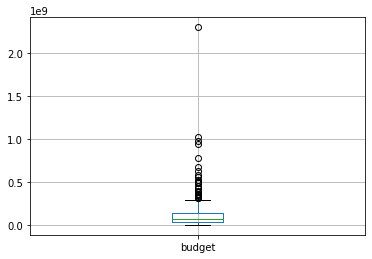

In [40]:
movies_budget.boxplot(column='budget');

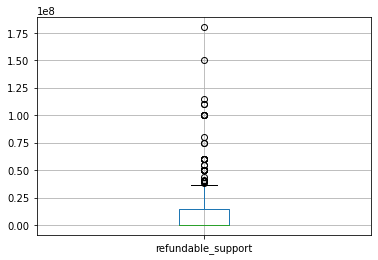

In [41]:
movies_budget.boxplot(column='refundable_support');

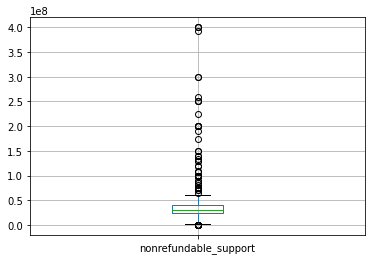

In [42]:
movies_budget.boxplot(column='nonrefundable_support');

Мы видм высокие значения в столбцах refundable_support, nonrefundable_support и budget. Считать их выбросами так же нельзя: бюджет фильма "складывается из заработных плат членов съемочной группы (включая гонорары актеров и автора сценария) + стоимость аренды или покупки съемочного оборудования + оплата пользования локациями и/или постройка декораций + пост-продакшн (обработка звука и изображения после съемок) + деньги на прокат фильма" (цитата с яндекс.кью).
Можно допустить, что эти аномальные значения являются крайне дорогими фильмами.

Взглянем подробнее на столбцы refundable_support, nonrefundable_support и budget. Нас интересуют наглядное соотношение этих столбцов (но не забываем о том, что господдержка является частью бюджета). 

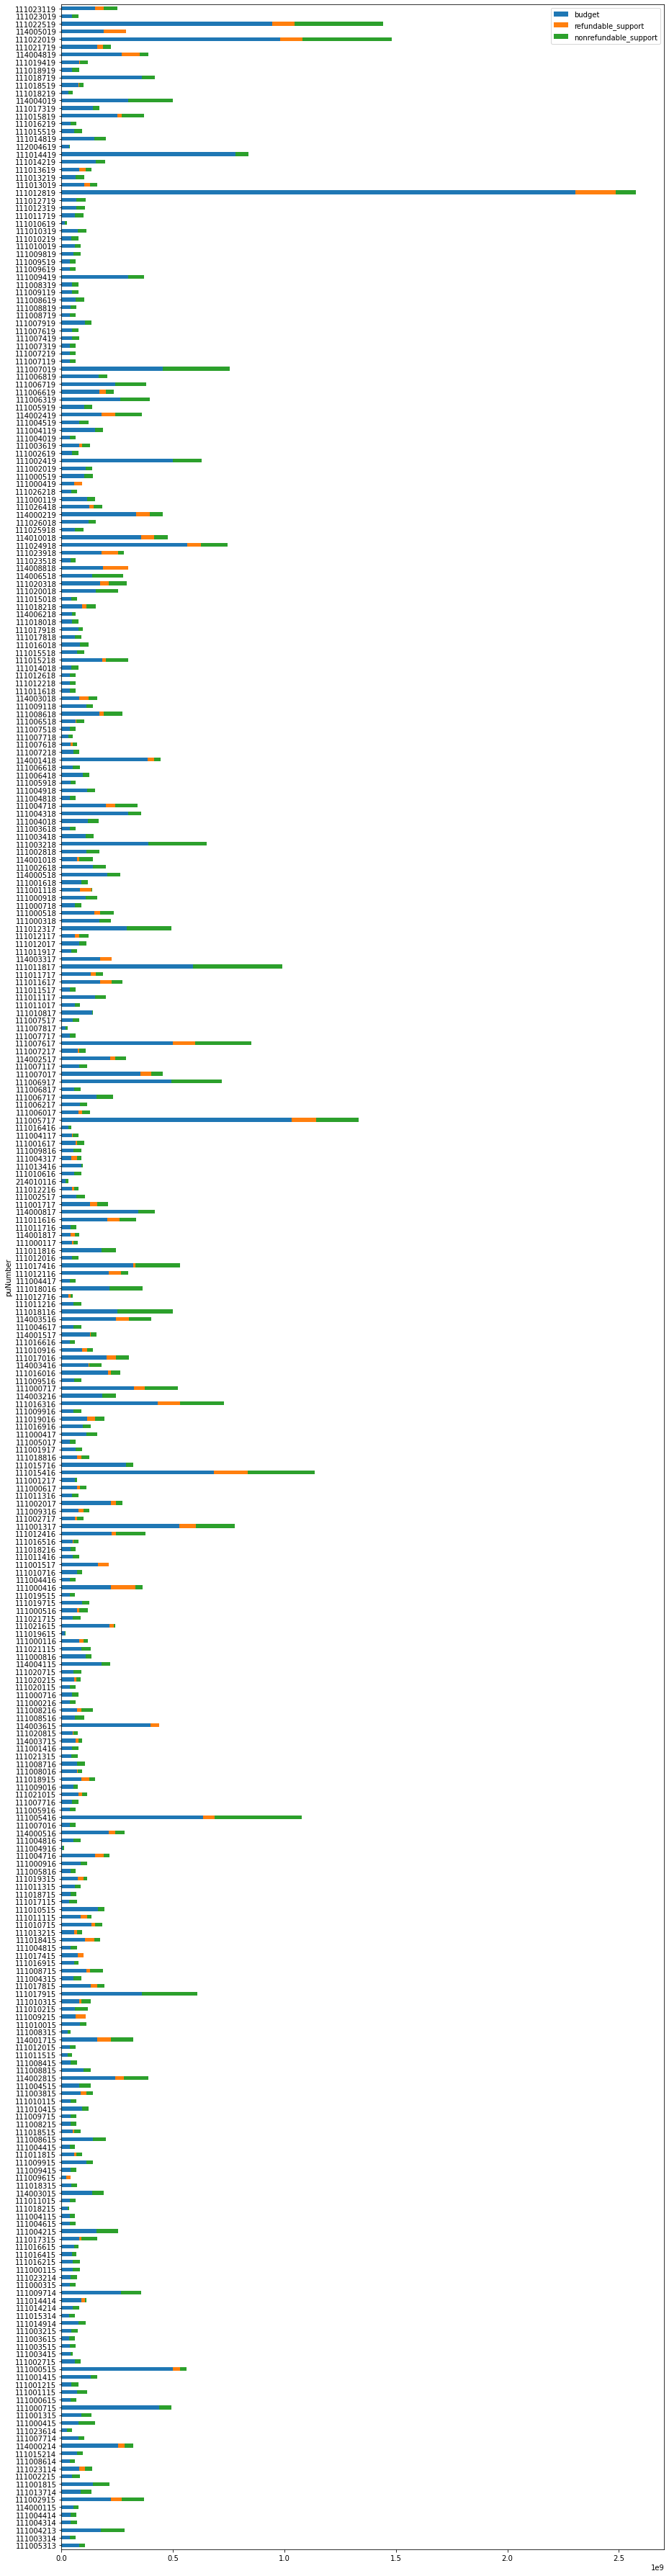

In [43]:
movies_budget[['puNumber', 'budget', 'refundable_support', 'nonrefundable_support']] \
        .plot.barh(x='puNumber', stacked=True, figsize=(15,65));

In [44]:
#movies_budget.query('puNumber==111012819')

На построенном графике мы видим фильм с очень большим бюджетом, срез по номеру прокатного удостоверения (111012819), показал что это фильм "Тайна Печати Дракона". В ролях: Джеки Чан, Арнольд Шварценеггер, Чарльз Дэнс (он же, Тайвин Ланнистер из "Игры престолов") и многие другие американские и китайские актеры. Этот звездный актерский состав объясняет потраченный на фильм бюджет.

Возьмем срез и исключим строку с аномально большим бюджетом.

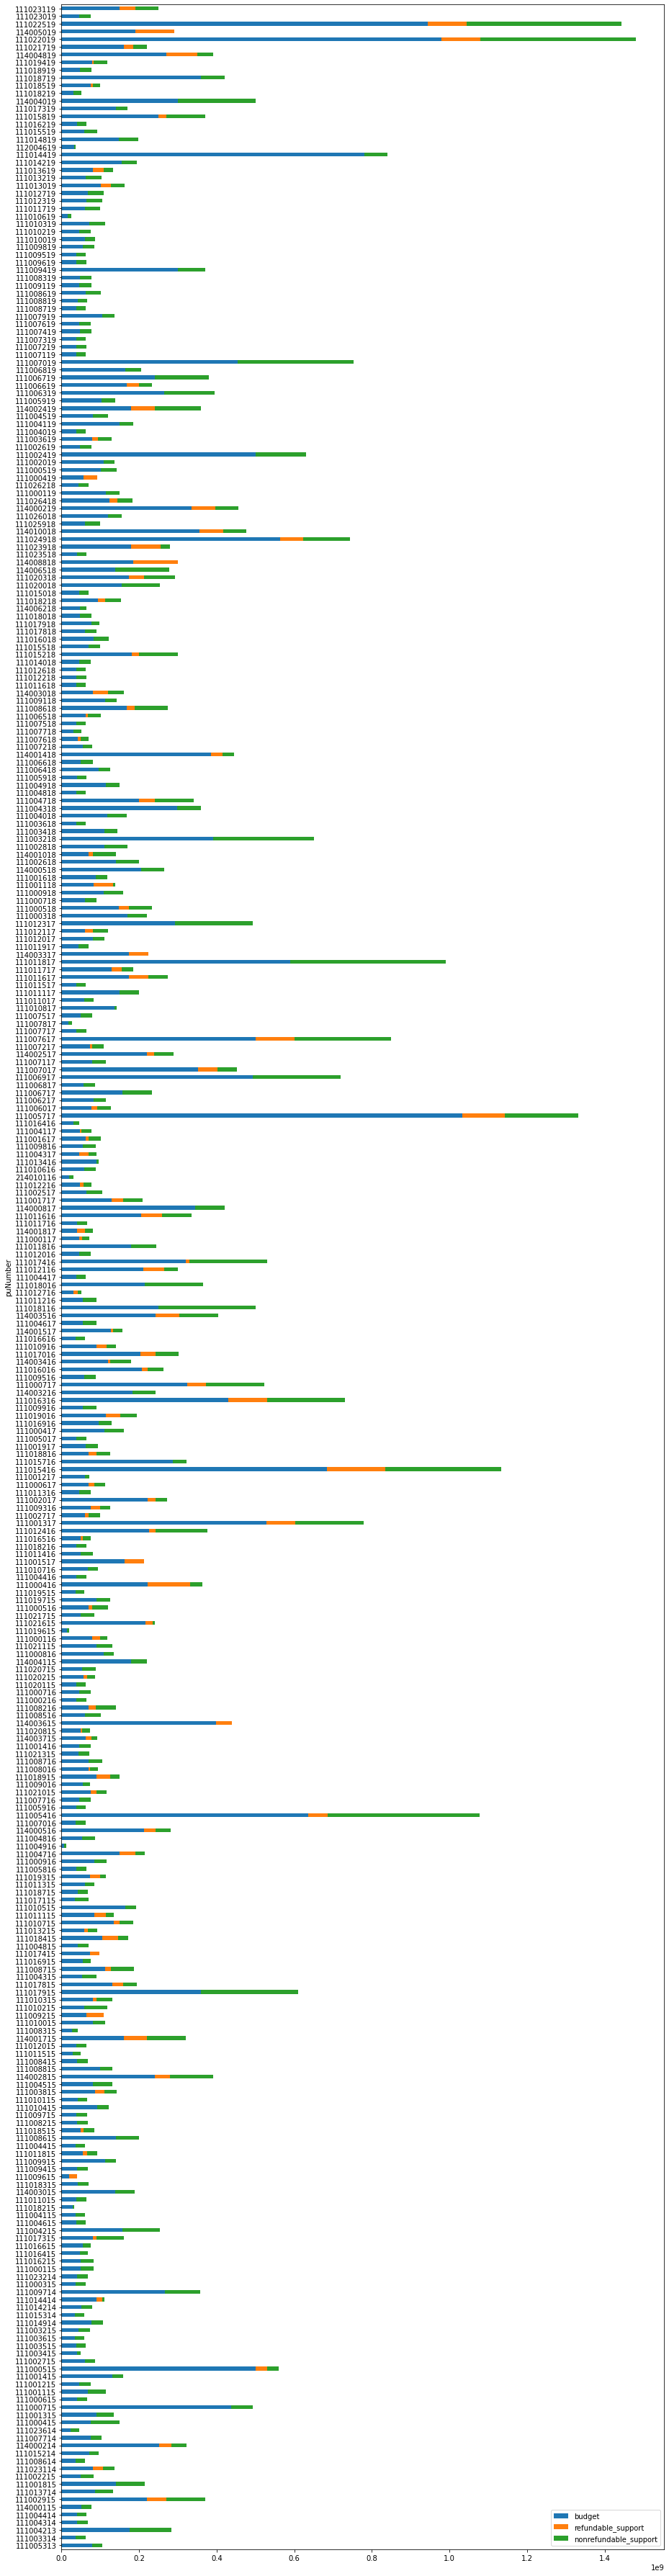

In [45]:
movies_budget[['puNumber', 'budget', 'refundable_support', 'nonrefundable_support']] \
            .query('puNumber!=111012819') \
            .plot.barh(x='puNumber', stacked=True, figsize=(15,65));

После среза изменился масштаб графика. Мы видим еще несколько фильмов с бюджетом на порядок больше, чем у остальных фильмов + с большой долей господдержки.
Это 111022519 ("Вторжение" Ф. Бондарчука), 111022019 ("Союз спасения") и  111005717 ("Матильда"). Масштабность кинополотна и  актерский состав объясняют вложенный в картины бюджет.

In [46]:
#movies_budget.query('puNumber==111022519')

In [47]:
#movies_budget.query('puNumber==111022019')

In [48]:
#movies_budget.query('puNumber==111005717')

в случае с "Матильдой" вскрылась ошибка в жанре: было "фэнтези, комедия, семейный" -> должно быть "драма, история, триллер"
можно заменить (и желательно где-нибудь в самом начале на этапе таблицы mkrf_movies), можно оставить как есть

In [49]:
#mkrf_movies.loc[movies_join['puNumber']==111005717, 'genres'] = 'драма, история, триллер'

Изучив столбцы budget, refundable_support и nonrefundable_support мы обнаружили несколько особенностей:
- есть фильмы с аномально большим и аномально маленьким бюджетом;
- есть фильмы целиком снятые на деньги господдержки и не имеющие собственного бюджета;
- есть фильмы целиком снятые на невозвратные средства поддержки;
- соотношение возвратных и невозвратных средств разное, но чаще всего доля невозвратных больше (есть исключения).

In [50]:
# Посмотреть подробнее на фильмы снятые целиком на невозвратные средства господдержки.

#movies_budget.query('(refundable_support==0) & (nonrefundable_support>0)')

In [51]:
# Посмотреть подробнее на фильмы, где сумма возвратной господдержки больше чем невозвратной.

#movies_budget.query('refundable_support > nonrefundable_support')

In [52]:
# Посмотреть подробнее на фильмы, где сумма возвратной господдержки меньше чем невозвратной.

#movies_budget.query('refundable_support < nonrefundable_support')

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [53]:
# Добавим столбец с годом выхода фильмы в таблцу "movies_join"

movies_join['show_start_year'] = pd.DatetimeIndex(movies_join['show_start_date']).year

In [54]:
# Добавим столбец с годом выхода фильмы в таблцу "movies_budget"

movies_budget['show_start_year'] = pd.DatetimeIndex(movies_budget['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [55]:
def get_first_value(s, sep = ','):
    try:
        value_lst = s.split(sep=sep)
        return value_lst[0]
    except AttributeError:
        return float('nan')

movies_join['main_genres'] = movies_join['genres'].apply(get_first_value)
movies_join['main_director'] = movies_join['director'].apply(get_first_value)

In [56]:
# Добавим столбцы с основным жанром и именем главного режиссера в таблцу "movies_budget"

movies_budget['main_genres'] = movies_budget['genres'].apply(get_first_value)

movies_budget['main_director'] = movies_budget['director'].apply(get_first_value)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [57]:
def state_support(row):
    budget = row['budget']
    refundable_support = row['refundable_support']
    nonrefundable_support = row['nonrefundable_support']
    
    quotient = (refundable_support + nonrefundable_support) / budget * 100
    return quotient

movies_join['quotient_support'] = movies_join.apply(state_support, axis=1)

In [58]:
movies_join['quotient_support'] = movies_join['quotient_support'].round(0)

На предыдущем шаге мы заменили нулевое значение бюджета на сумму средст госсподдержки.

<a id="analysis"> </a>
### Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [59]:
# Создадим новую таблицу movies_known_year с фильмами, вышедшими в прокат в кинотеатрах

movies_known_year = movies_join.copy()
movies_known_year = movies_join.query('box_office.isna()!=True')

In [60]:
#  Посчитаем долю, которую составляют фильмы, вышедшие в прокат в кинотеатрах 

total_films = movies_join.shape[0]
known_year = movies_known_year.shape[0]
cinema_ratio_total = (known_year / total_films)*100
round(cinema_ratio_total)

42

Всего фильмов в базе - 7486. Фильмов, выходивших в прокат в кинотеатре - 3158. Доля таких фильмов - 42% от общего количества.

In [61]:
# Узнаем долю вышедших фильмов по годам

release_percent = (movies_known_year.groupby('show_start_year')['show_start_year'].count() / movies_known_year.shape[0]) *100
release_percent.round(2)

show_start_year
2010     3.32
2011     3.45
2012     4.05
2013     5.83
2014     8.83
2015    14.72
2016    16.66
2017    11.30
2018    15.04
2019    16.78
Name: show_start_year, dtype: float64

In [62]:
# Код ревьюера

movies_join.groupby('show_start_year').agg({'box_office' : lambda x : (x.isna() == False).mean()})

,box_office
show_start_year,
2010,0.106599
2011,0.175241
2012,0.215852
2013,0.292063
2014,0.345725
2015,0.659574
2016,0.643032
2017,0.706931
2018,0.533109


Лучше всего данные о фильмах представлены в 2019, 2016 и 2018 годах. Хуже всего в 2010-2012.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [63]:
movies_known_year = movies_known_year.query('box_office>0')

In [64]:
movies_known_year.groupby('show_start_year')['box_office'].sum().sort_values(ascending=True) \
                                                          .to_frame().style.format('{:,.0f}')

,box_office
show_start_year,
2010,"2,428,654"
2012,"6,955,423"
2011,"14,102,765"
2013,"29,799,706"
2014,"7,444,951,859"
2015,"39,497,365,196"
2016,"47,866,299,742"
2019,"48,425,708,780"
2017,"48,563,707,218"


In [65]:
# Код ревьюера

movies_known_year.groupby('show_start_year')['box_office'].sum().sort_values(ascending=True) \
                                                          .to_frame().style.format('{:,.0f}')

,box_office
show_start_year,
2010,"2,428,654"
2012,"6,955,423"
2011,"14,102,765"
2013,"29,799,706"
2014,"7,444,951,859"
2015,"39,497,365,196"
2016,"47,866,299,742"
2019,"48,425,708,780"
2017,"48,563,707,218"


In [66]:
movies_known_year_box_office = movies_known_year.pivot_table(index = 'show_start_year', values = 'box_office', \
                               aggfunc=['count', 'mean', 'median']).round(2)
movies_known_year_box_office.style.format('{:,.0f}')

,count,mean,median
,box_office,box_office,box_office
show_start_year,,,
2010,101,"24,046","1,710"
2011,109,"129,383","3,000"
2012,123,"56,548","6,220"
2013,179,"166,479","3,580"
2014,273,"27,270,886","20,400"
2015,462,"85,492,132","5,003,450"
2016,525,"91,173,904","3,915,041"
2017,357,"136,032,793","9,968,340"


Максимальная сумма сборов была в 2018 году.
Минимальная сумма сборов была в 2010 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [67]:
movies_known_year_box_office = movies_known_year.pivot_table(index = 'show_start_year', values = 'box_office', \
                               aggfunc=['count', 'sum', 'mean', 'median']).round(2)
movies_known_year_box_office.style.format('{:,.0f}')

,count,sum,mean,median
,box_office,box_office,box_office,box_office
show_start_year,,,,
2010,101,"2,428,654","24,046","1,710"
2011,109,"14,102,765","129,383","3,000"
2012,123,"6,955,423","56,548","6,220"
2013,179,"29,799,706","166,479","3,580"
2014,273,"7,444,951,859","27,270,886","20,400"
2015,462,"39,497,365,196","85,492,132","5,003,450"
2016,525,"47,866,299,742","91,173,904","3,915,041"
2017,357,"48,563,707,218","136,032,793","9,968,340"


В сводную таблицу также был добавлена колонка count для подсчета количества фильмов, выходивших в кинотеатрах каждый год и сумма кассовых сборов из предыдущего шага (для наглядности). В этой таблице смущают очень маленькие медианные значения кассовых сборов 2010-2014 годов. Если мы возьмем, к примеру, 2010 год и воспользуемся логикой, то окажется, что за год проката 50 фильмов собрали кассу меньше 1700 рублей, а 50 - больше.
Логика подсказывает, что вряд ли такое может иметь место в реальной жизни.

В данных полнее всего представлены периоды 2015-2016 и 2018-2019 годы.

In [68]:
movies_known_year.query('show_start_year==2010')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_genres,main_director,quotient_support
3790,"Легион_.(Фильм содержит сцены ужасов, насилия ...",121000310,2010-01-25T12:00:00.000Z,Художественный,Болд Филмз,США,Скотт Стюарт,"Дэвид Ланкастер, Майкл Литвак",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,560.0,2010,NaN,Скотт Стюарт,NaN
3791,Белка и Стрелка. Звездные собаки,114000310,2010-01-29T12:00:00.000Z,Анимационный,"ОАО ""ЦНФ""",Россия,"С.Ушаков, И.Евланникова",С.А.Зернов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.0,"мультфильм, комедия, приключения",22247.0,2010,мультфильм,С.Ушаков,NaN
3800,Из Парижа с любовью,121001310,2010-01-26T12:00:00.000Z,Художественный,Европа Корпорейшн,Франция,Пьер Морель,"Люк Бессон, Индия Осборн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,"боевик, триллер, комедия",1585.0,2010,боевик,Пьер Морель,NaN
3802,Золотое сечение,111000610,2010-01-26T12:00:00.000Z,Художественный,"ОАО ""ТПО ""Санкт-Петербургская студия документа...",Россия,С.Дебижев,"А.Тельнов, С.Федотов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.9,приключения,760.0,2010,приключения,С.Дебижев,NaN
3803,Буду помнить,111000910,2010-01-28T12:00:00.000Z,Художественный,"ООО ""ГРИНСИТИ""",Россия,В.Воробьев,А.Сафронов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,военный,32175.0,2010,военный,В.Воробьев,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,Душевная кухня,121000610,2010-01-19T12:00:00.000Z,Художественный,"Корасон Интертейнмент, Дорие Филм, Пирамид Про...",Германия,Фатих Акин,"Фатих Акин, Клаус Маек",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма, комедия",420.0,2010,драма,Фатих Акин,NaN
4792,Повелитель стихий,121011210,2010-06-11T12:00:00.000Z,Художественный,"Блайндинг Эдж Пикчерз, Кеннеди/Маршалл Компани...",США,М.Найт Шьямалан,М.Найт Шьямалан,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.2,"фэнтези, боевик, приключения",700.0,2010,фэнтези,М.Найт Шьямалан,NaN
4793,"Все в порядке, мама",111006410,2010-06-17T12:00:00.000Z,Художественный,"АНО ""Творческая студия ""СТЕЛЛА""",Россия,Ф.Попов,Ф.Попов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,драма,3660.0,2010,драма,Ф.Попов,NaN
4794,Приключения в тридесятом царстве.,111006610,2010-06-18T12:00:00.000Z,Художественный,"ООО Киностудия ""ЮНОСТЬ""",Россия,В.Ивановская,В.Бердочкин,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,1.2,"детский, фэнтези, приключения",24978.0,2010,детский,В.Ивановская,NaN


Выполнив срез по таблице movies_known_year мы видим странные значения box_office: например, 700, 560, 760 рублей. Необходимо запросить дополнительные данные.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [69]:
movies_known_year_age_restriction = movies_known_year.pivot_table(index = ['show_start_year', 'age_restriction'], \
                                                                  values = 'box_office', \
                                                                  aggfunc=['count', 'median', 'sum'])
movies_known_year_age_restriction = movies_known_year_age_restriction.query('show_start_year>=2015')

In [70]:
movies_known_year_age_restriction.sort_values(ascending=False, by=[('sum', 'box_office')]).style.format('{:,.0f}')

В таблицу дополнительно были добавлены столбцы с количество фильмов и медианным значение кассовых сборов.

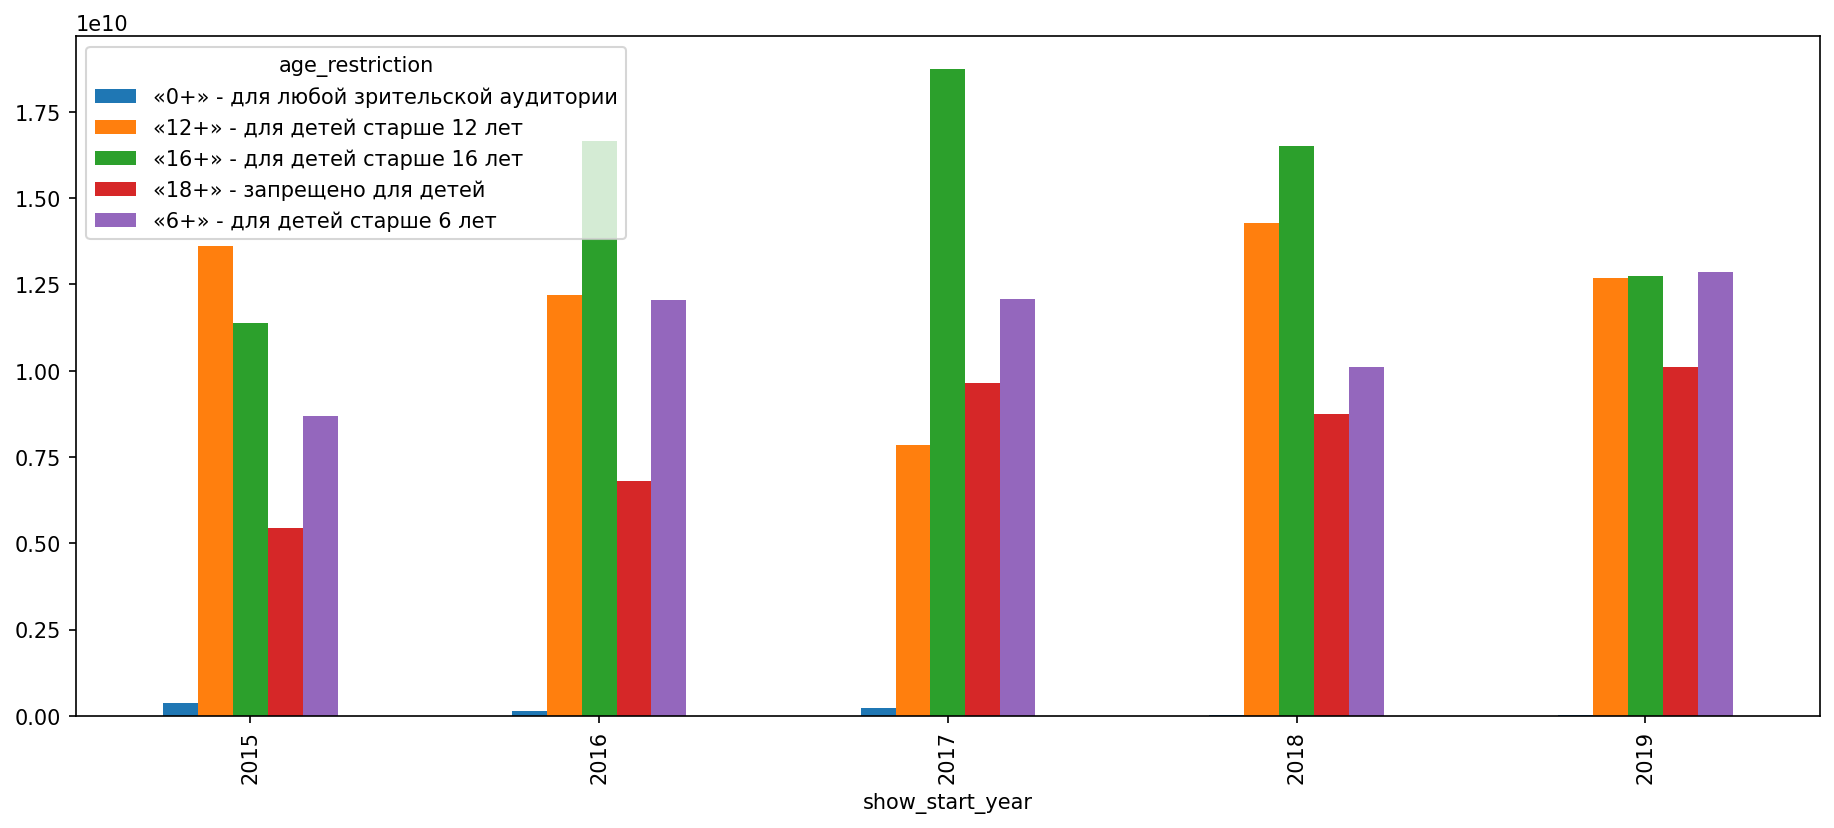

In [72]:
import matplotlib.pyplot as plt

data_to_plot = movies_known_year_age_restriction[('sum','box_office')].unstack('age_restriction')

fig, ax = plt.subplots(figsize=(15,6), dpi=150)
data_to_plot.plot(kind='bar', ax=ax);

Построенный график подтверждает выводы, которые мы можем сделать по составленной выше сводной таблице: в период с 2916 по 2018 годы самыми популярными у зрителей были категории фильмов "16+".
Категория "12+" была самой популярной в 2015 году, в 2016 и в 2018 году - второй по пополярности.

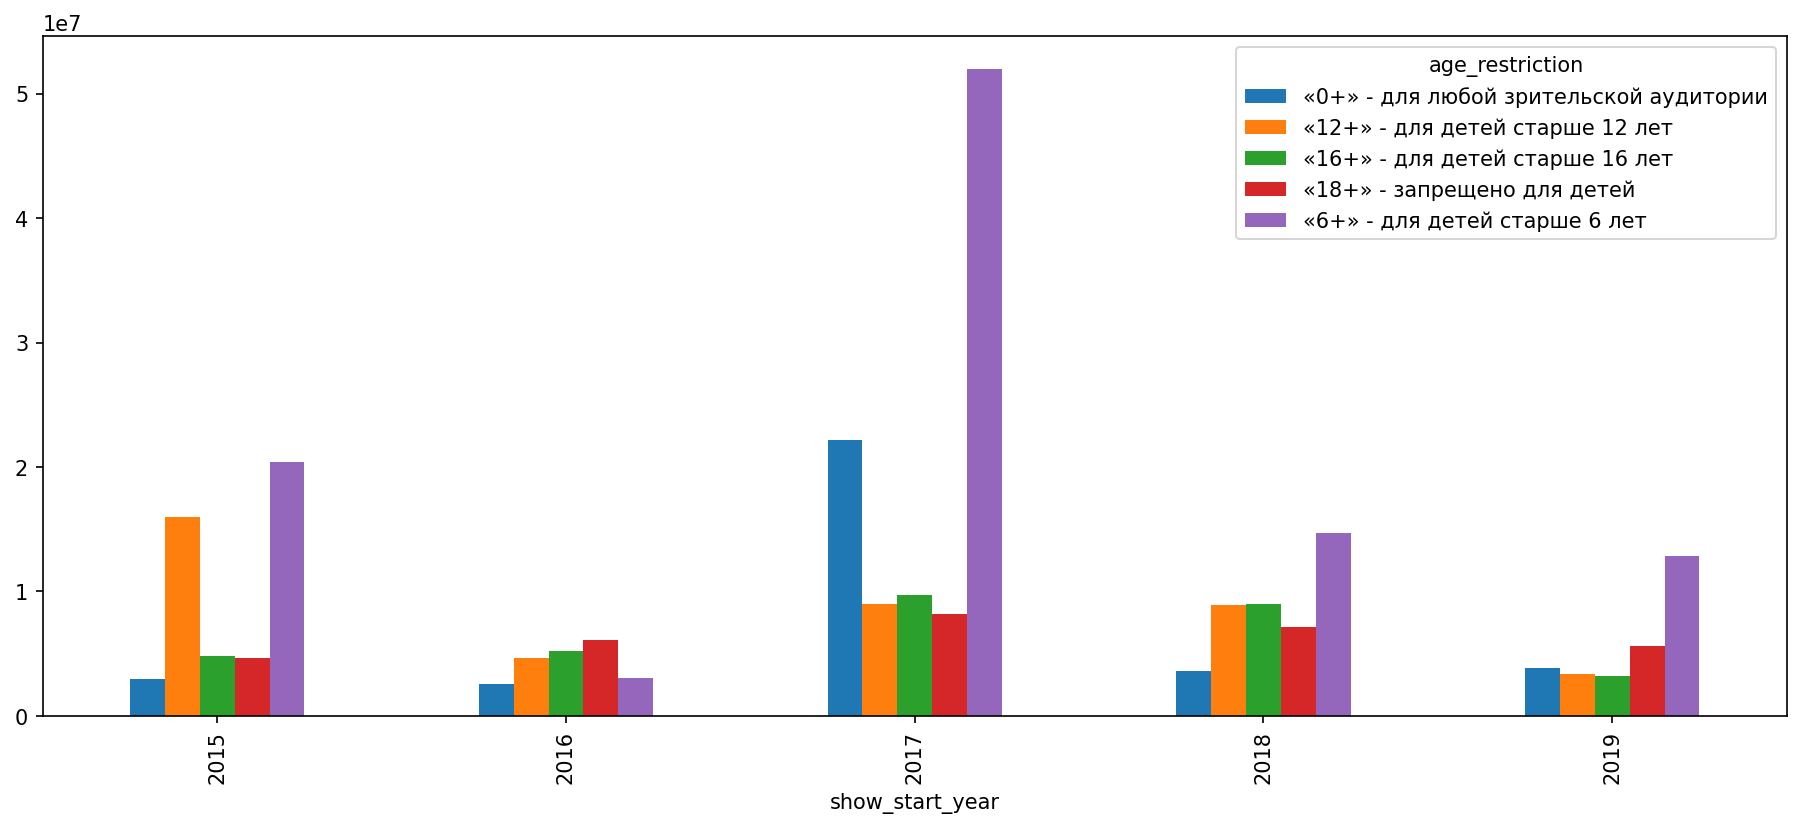

In [73]:
data_to_plot = movies_known_year_age_restriction[('median','box_office')].unstack('age_restriction')

fig, ax = plt.subplots(figsize=(15,6), dpi=150)
data_to_plot.plot(kind='bar', ax=ax);

Высокие медианные значения можно объяснить небольшим количеством фильмов в категории, но высокими кассовыми сборами.

In [74]:
#movies_known_year.query('(show_start_year==2017) & (age_restriction=="«16+» - для детей старше 16 лет")') \
#                .sort_values('box_office', ascending=False) \
#                .head(15)

In [75]:
#movies_known_year.query('(show_start_year==2016) & (age_restriction=="«16+» - для детей старше 16 лет")') \
#                .sort_values('box_office', ascending=False) \
#                .head(15)

In [76]:
#movies_known_year.query('(show_start_year==2018) & (age_restriction=="«16+» - для детей старше 16 лет")') \
#                .sort_values('box_office', ascending=False) \
#                .head(15)

In [77]:
#movies_known_year.query('(show_start_year==2018) & (age_restriction=="«12+» - для детей старше 12 лет")') \
#                .sort_values('box_office', ascending=False) \
#                .head(15)

In [78]:
#movies_known_year.query('(show_start_year==2015) & (age_restriction=="«12+» - для детей старше 12 лет")') \
#                .sort_values('box_office', ascending=False) \
#                .head(15)

Сделав срез по годам с самыми большими кассовыми сборами и по возрастным ограничениям (первые пять в сводной таблице movies_known_year_age_restriction), мы выяснили, что ежегодные кассовые сборы делают крупные американские проекты ("звездные войны", например) и фильмы про супергероев, на которые каждый уважающий себя фанат должен сходить не по одному разу :) )

<a id="support"> </a>
### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

На предыдущих этапах мы создавали таблицу movies_budget, где были собраны фильмы, имеющие не пустые значения в колонках refundable_support, nonrefundable_support и budget.

In [79]:
# Проверим уникальные значения источников финансирования в таблице movies_budget

movies_budget['financing_source'].unique()

array(['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [80]:
# Проверим сколько раз "Министерство культуры", "Фонд кино", "Министерство культуры, Фонд кино"  фигурирует в качестве 
# источника финансирования в исходной объединенной таблице movies_join

# movies_join.query('financing_source=="Министерство культуры"').shape[0]
# movies_join.query('financing_source=="Фонд кино"').shape[0]
# movies_join.query('financing_source=="Министерство культуры, Фонд кино"').shape[0]

In [81]:
movies_budget['financing_source'].value_counts() 

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

"Министерство культуры" - 164
"Фонд кино" - 146
"Министерство культуры, Фонд кино" - 22
 
Итого: 332 строки с известными источниками финансирования, которые вошли и в таблицу movies_budget.

Других фильмов, с известным бюджетом и суммой гос поддрежки, кроме тех, которых спонсирует Министерство культуры и Фонд кино в базе нет.

Это наводит на две мысли:
- либо в нашей стране невозможно проспонсировать фильм (если ты не представитель Министерства культуры или Фонда кино);
- либо Министерство культуры, как создаталей базы, не интересуют другие источники финансирования. Их интересуют только средства, выделенные из собственного бюджета.

В пользу второй теории говорит статья на lenta.ru от 07.05.2018 под заголовком "Культурные коллекторы. Студии взяли у властей деньги на фильмы, которые не сняли. Пора возвращать долги"

In [82]:
movies_budget.query('box_office.isna()==True').shape[0]

14

Из 332 фильмов, проспонсированных Министерством культуры / Фондом кино в базе нет данных о кассовых сборов 14 фильмов. Предполагаем, что на момент 2019 года фильм в кино так и не вышел.

In [83]:
refundable_support_sum = movies_budget['refundable_support'].sum()
refundable_support_sum

3939000000.0

In [84]:
nonrefundable_support_sum = movies_budget['nonrefundable_support'].sum()
nonrefundable_support_sum

16261688312.0

In [85]:
support_sum = movies_budget['refundable_support'].sum() + movies_budget['nonrefundable_support'].sum()
support_sum

20200688312.0

In [86]:
box_office_sum = movies_budget['box_office'].sum()
box_office_sum

42113509574.78

Сумма возврвратных средств - 3.94 млрд рублей, невозвратных - 16.3 млрд рублей, сумма господдержки - 20.2 млрд рублей. Сумма кассовых сборов - 42 млрд рублей. Мы можем предположить, что вложенные деньги окупились. Взглянем подробнее на график и сделаем срез по таблице. Нас интересуют фильмы, кассовые сборы которых меньше чем вложенные средства

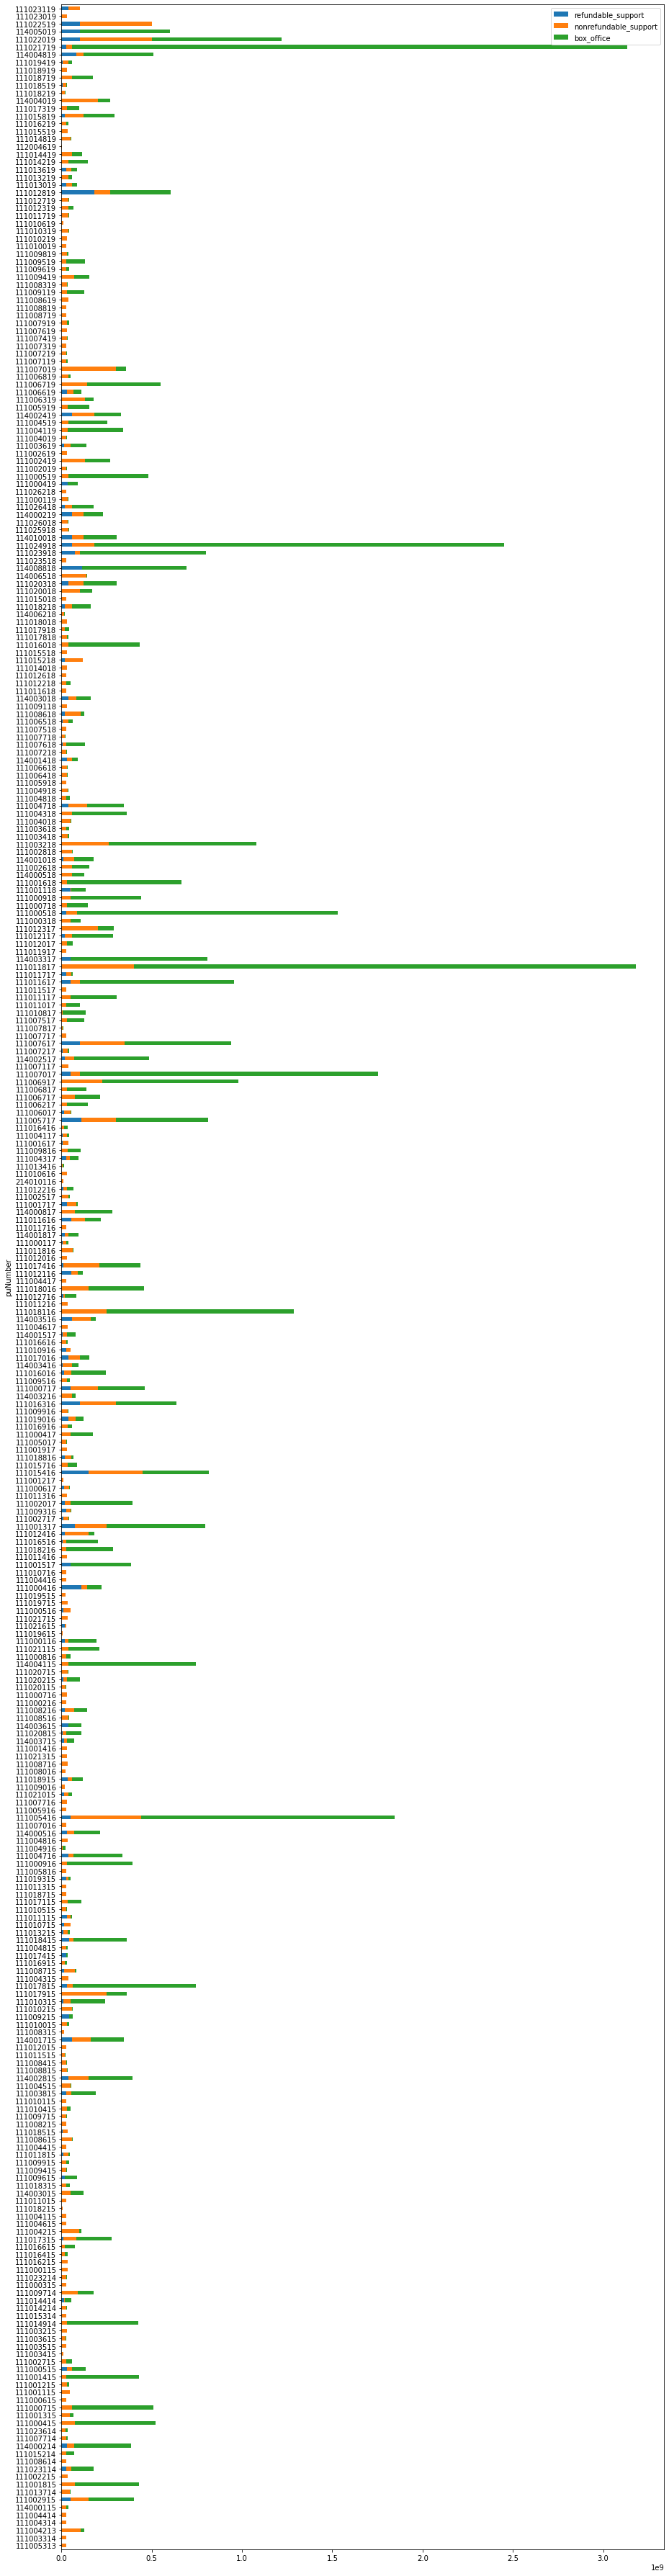

In [87]:
movies_budget[['puNumber', 'refundable_support', 'nonrefundable_support', 'box_office']] \
            .plot.barh(x='puNumber', stacked=True, figsize=(15,65));

In [88]:
# movies_budget.query('refundable_support + nonrefundable_support>=box_office')

In [89]:
movies_budget.query('budget>=box_office').shape[0]

239

Из 318 фильмов с известной суммой кассовых сборов, 239 не окупились.

In [90]:
# Сделаем срез по фильмам, которые не окупились. Сгруппируем строки по основному жанру

movies_budget.query('budget>=box_office').groupby('main_genres')['main_genres'].count().sort_values(ascending=False)

main_genres
драма          73
комедия        42
мультфильм     18
мелодрама      14
триллер        13
фэнтези        10
фантастика      8
ужасы           7
военный         6
детектив        5
приключения     5
боевик          4
мюзикл          4
история         3
детский         3
криминал        3
семейный        3
биография       2
реальное ТВ     1
спорт           1
Name: main_genres, dtype: int64

Больше всего фильмов не окупилось в жанрах "драма", "комедия" и "мультфильм".

In [91]:
# Сделаем срез по фильмам, которые не окупились. Сгруппируем строки по основному жанру

movies_budget.query('budget>=box_office').groupby('show_start_year')['show_start_year'].count().sort_values(ascending=False)

show_start_year
2015    67
2019    49
2016    48
2018    36
2017    24
2014    13
2013     2
Name: show_start_year, dtype: int64

Самый "окупаемый" год для российского кинопроката - 2013. Больше всего фильмов не окупилось в 2015 году.

In [92]:
movies_budget['ratings'].describe()

count    314.000000
mean       6.000637
std        1.123948
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

In [93]:
movies_join.query('financing_source.isna()==True')['ratings'].describe()

count    6176.000000
mean        6.503578
std         1.095038
min         1.100000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.200000
Name: ratings, dtype: float64

Метод describe показал, что медаина оценок, выставленных фильмам, получившим господдержку - 6.2, 75% всех фильмов лежат на границе до 6.7. 

Фильмы, не получившие господдержку, имеют рейтинг выше: медианное значение - 6.6, 75% - 7.3.

In [94]:
movies_budget.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office',
       'show_start_year', 'main_genres', 'main_director'],
      dtype='object')

In [95]:
# Сгруппируем данные и выведем десять режиссеров, которые чаще всего получают господдержку на создание фильмов.

movies_budget.groupby('main_director')['main_director'].count().sort_values(ascending=False).head(10)

main_director
Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
А.Котт           3
Н.Хомерики       3
К.Шипенко        3
Д.Шмидт          3
А.Цицилин        3
А.Аксененко      3
С.Мокрицкий      3
Name: main_director, dtype: int64

In [96]:
# Сгруппируем данные и выведем десять самых популярных жанров фильмов, получивших господдержку

movies_budget.groupby('main_genres')['main_genres'].count().sort_values(ascending=False).head(10)

main_genres
драма          93
комедия        74
мультфильм     31
триллер        15
мелодрама      15
фантастика     11
фэнтези        11
ужасы          10
военный         9
приключения     7
Name: main_genres, dtype: int64

Чаще всего деньги выделяют на производство драм, комедий и мультфильмов.

In [97]:
movies_budget.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year
puNumber,1.000000,0.010413,-0.030194,-0.016573,0.038466,0.053665,-0.017975
refundable_support,0.010413,1.000000,0.359622,0.654865,0.004850,0.312137,0.089616
nonrefundable_support,-0.030194,0.359622,1.000000,0.621026,0.141521,0.455729,0.117645
budget,-0.016573,0.654865,0.621026,1.000000,0.101342,0.375631,0.164391
ratings,0.038466,0.004850,0.141521,0.101342,1.000000,0.155149,0.044702
box_office,0.053665,0.312137,0.455729,0.375631,0.155149,1.000000,0.119278
show_start_year,-0.017975,0.089616,0.117645,0.164391,0.044702,0.119278,1.000000


Построим матрицу корреляции. Нас интересуют столбцы refundable_support, nonrefundable_support, budget, ratings и box_office.
Мы видим:
1. сильную положительную корреляцию между суммой возвратных средств и бюджетом (0.64) и суммой невозвратных средств и бюджетом (0.6). Это объясняется тем, что средства господдержки являются частью бюджета, увеличивается господдержка, значит увеличивается бюджет;
2. слабая положительная - между бюджетом и кассовыми сборами (0.36) - высокий бюджет еще не означает, что фильм вызовет интерес и зрители пойдут в кинотеатр;
3. очень слабая положительная - между рейтингом и кассовыми сборами (0.14) - не все, кто сходил в кино, остался доволен и поставил высокий рейтинг;
4. и практически отсутствует между бюджетом и рейтингом (0.09) - высокий бюджет не означает высокие зрительские оценки.

<a id="conclusion"> </a>
### Шаг 5. Напишите общий вывод

Ход исследования:
1. Предобработка данных:
- изучение общей информации, объединение таблиц mkrf_shows и mkrf_movies;
- изменение типов данных;
- проверка и обработка пропущенных значений, проверка на дубликаты;
- изучение категориальных значений, исправление проблемных значений в столбцах;
- изучение количественных значений (проверка столбцов refundable_support, nonrefundable_support и budget).

2. Исследовательский анализ данных:
- добавление новых столбцов - информация о годе проката, имя и фамилия главного режиссера, основной жанр фильма;
- подсчет количества фильмов, выходящих в прокат каждый год;
- изучение динамики проката по годам;
- подсчет средней и медианной суммы сборов для каждого года;
- влияние возрастного рейтинга на сборы фильмов в прокате с 2015 по 2019 год;
- исследование фильмов, получивших господдержку;

Данное исследование было направленно на изучение рынка российского проката и выявление текущих трендов.

Выполняя предобработку данных, мы столкнулись с многочисленными пропусками, которое логически не сможем заполнить:
- в столбцах refundable_support, nonrefundable_support, budget, financing_source - более 95 % пропусков;
- в столбце box_office - ~58 % пропусков;
- в столбцах ratings, genres - ~13 % пропусков.
Необходимо запросить дополнительные данные.

В столбцах refundable_support, nonrefundable_support, budget, financing_source одинаковое количество пропусков (7154). Это может быть совпадением или данные в публичной базе данных были умышленно скрыты.

Пропуски в столбцах director и producer могут не быть "пропусками" в том смысле, который мы вкладываем в это слово.

Цитируем википедию: "Продю́сер (англ. producer, от produce — производить) в кинематографе — доверенное лицо кинокомпании, осуществляющее идейно-художественный и организационно-финансовый контроль над постановкой фильма. Он также принимает активное участие в подборе актёров, технического персонала. Функции продюсера могут выполнять также режиссёры, актёры, сценаристы."

И еще раз википедия: "Работа режиссёра в каждом виде искусства имеет свои особенности и не во всех случаях ему принадлежит главная роль: так, балет ставит прежде всего балетмейстер, а в оперном театре интерпретатором музыкально-драматического произведения является дирижёр."

Пропуски в столбцах producer и director могут быть объяснены типов художественного произведения и неоднозначным функционалом продюссера и режиссера.

Государственная поддержка осуществляется в двух видах — на возвратной и невозвратной основе. В первом случае продюсерские компании, получившие бюджетные средства, возвращают их государству после проката фильма. Во втором случае деньги выделяются безвозмездно, но в итоге компания должна представить чиновникам готовую картину.
Бюджет картины складывается из собственных средст компании, возвратных средств и невозвратных средств государственной поддержки.

Мы объединили непустые значения столбцов budget, refundable_support и nonrefundable_support в таблицу movies_budget для дальнейшего исследования. Примененный метод describe показал наличие минимальных значений равных 0 в столбцах бюджет и господдержка. Мы не можем считать такие значения выбросами, так как фильм может быть целиком снят на средства господдержки и не иметь собсветнного бюджета. Добускается и обратная ситуация - фильм снят на средства из собственного бюджета и господдержка не выделялась.

Построив график boxplot мы увидели высокие значения в столбцах refundable_support, nonrefundable_support и budget. Считать их выбросами так же нельзя: бюджет фильма складывается из заработных плат членов съемочной группы (включая гонорары актеров и автора сценария) + стоимость аренды или покупки съемочного оборудования + оплата пользования локациями и/или постройка декораций + пост-продакшн (обработка звука и изображения после съемок) + деньги на прокат фильма. Можно допустить, что эти аномальные значения объясняются затратами на производство фильма.

Построив график по столбцам [['puNumber', 'budget', 'refundable_support', 'nonrefundable_support']] мы наглядно увидели аномально высокие значения этих столбцов и смогли выяснить, на какие фильмы они были потрачены. Выполнив срез мы выяснили, что фильмы с аномально высокими бюджетами были созданы с привлечением именитых режжисеров и известных актеров.

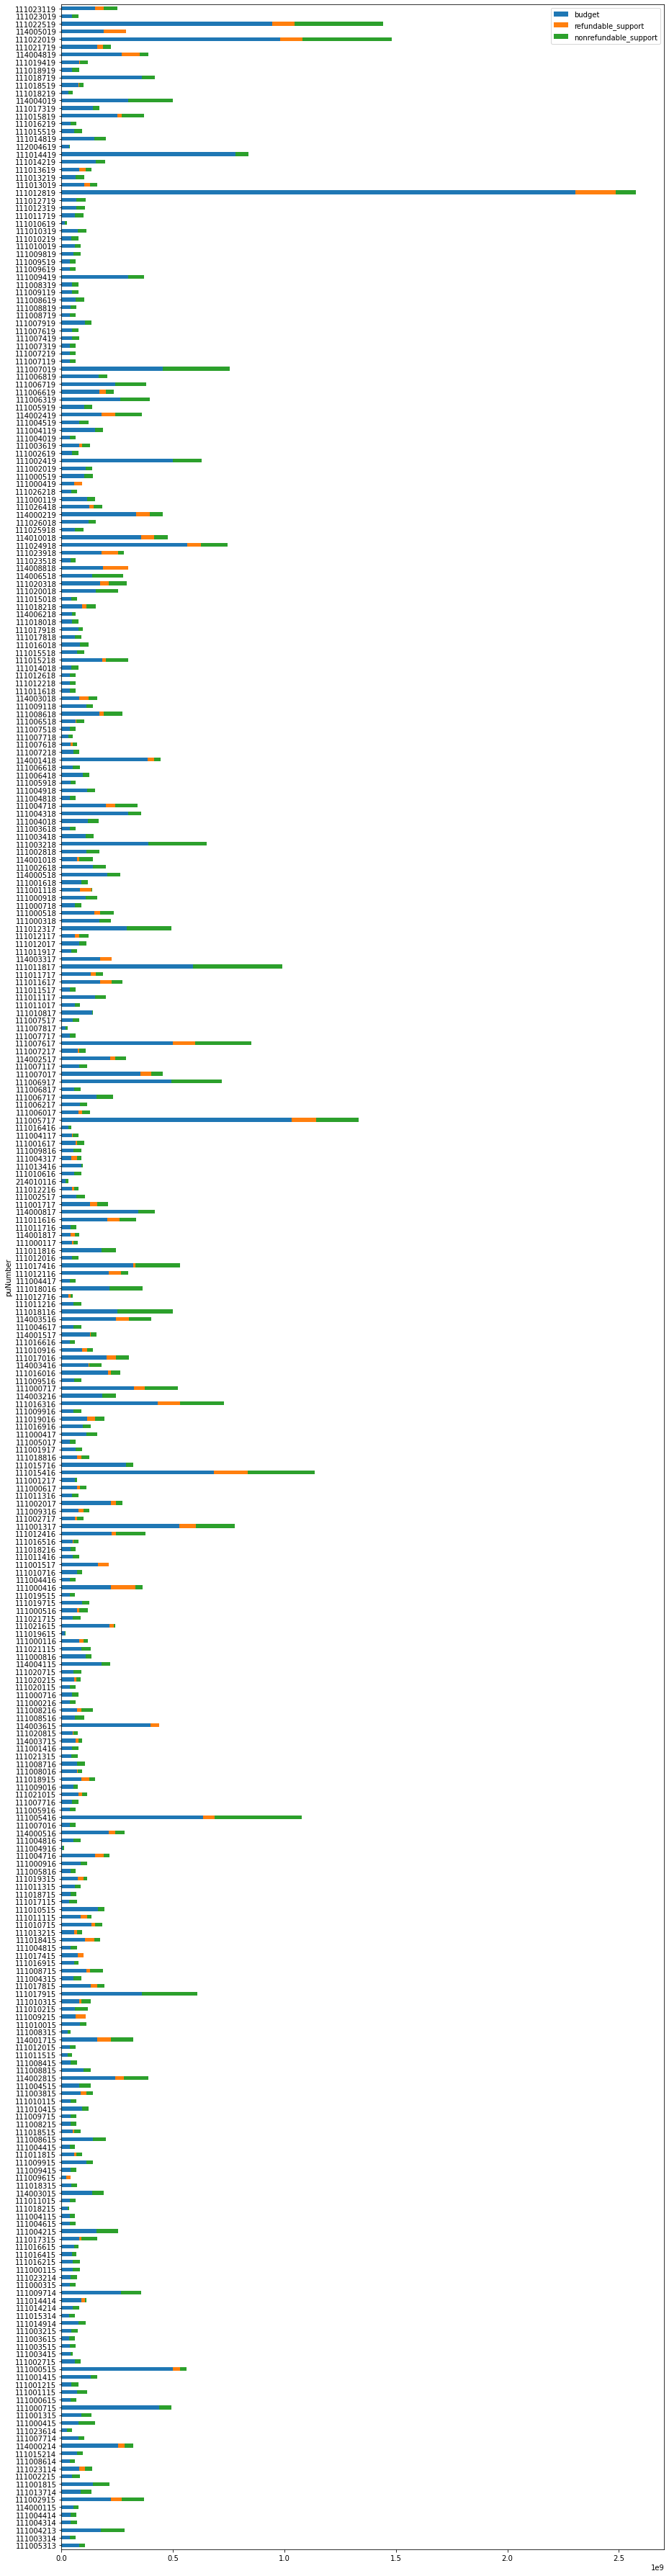

In [98]:
movies_budget[['puNumber', 'budget', 'refundable_support', 'nonrefundable_support']] \
        .plot.barh(x='puNumber', stacked=True, figsize=(15,65));

Всего фильмов в базе - 7486. Фильмов, выходивших в прокат в кинотеатре - 3158. Доля фильмов, вышедших в прокат - 42% от общего количества.

Динамика проката увеличивается нелинейно, самый маленькие кассовые сборы были в 2010, самые большие - в 2018. На временном промежутке 2010-2019 наблюдаются волнообразный рост.
Динамика количества фильмов, выходящих каждый год так же меняется воолнообразно: больше всего фильмов - в 2016 и 2018 годах, меньше всего - в 2010 и 2011.
Сгруппировав данные по столбцам с годом выхода фильма в прокат и кассовыми сборам в каждый из этих годов, мы обнаружили аномально маленькие значения медианн в период 2010-2014. Возможно, данные в этот период не полные и необходимо запросить дополнительную информацию.

Мы сгруппировали данные по году выхода в прокат, возрастному ограничению и кассовым сборам. Подсчитали, сколько фильмов с каждый возрастным ограничением выходит каждый год и какую кассу им удавалось собирать.

Мы выяснили, что фильмы с самыми высокими кассовыми сборами имеют рейтинг "16+" и "12+". Выполнив срезы данных по годам, мы нашли причину популярности фильмов с этими возрастными ограничениями - в эти категории попадают большая часть крупных американских проектов, которые популярны у российских зрителей (фильмы про супергероев Marvel и DC, "Пираты Карибского моря", "Звездные войны", пр.).

В числе самых непопулярных фильмы с рейтингом "0+" - их кассовые сборы самые маленькие, т.к. фильмов с этим возрастным ограничение немного. 
Фильмов с рейтингом "18+" на порядок больше, но их кассовые сборы небольшие: можно предположить что любителей таких фильмов немного, и они не могут собрать большую кассу.

Приступая к изучению фильмов, получивших господдержку, мы выдвинули несколько гипотез:
- гипотеза № 1 - чем больше бюджет фильма. тем выше рейтинг фильма;
- гипотеза № 2 - чем выше кассовые сборы, тем выше рейтинг фильма;
- гипотеза № 3 - чем выше бюджет фильма, тем выше будут кассовые сборы.

Изучив эти фильмы, мы пришли к интересным выводам: из 3158 фильмов, вышедших в кинотеатрах, только у 332 фильмов есть данные об источниках финансирования, бюджете и суммах господдержки. У всех этих фильмов источники финансирования либо Министерство культуры, либо Фонд кино, либо две эти организации одновременно.

Из этого мы можем сделать вывод, что Министерство культуры, как создаталей базы, не интересуют другие источники финансирования. Их интересуют только средства, выделенные из собственного бюджета.

Проанализировав столбец с данными о  кассовых сборах, мы обнаружили 14 пустых значений: предполагаем, что на момент 2019 года этот фильм еще не вышел.

Сумма возвратных средств, выделенных Министерством культуры за период 2010-2019 составила 3.94 млрд рублей, невозвратных - 16.3 млрд рублей, итоговая сумма господдержки - 20.2 млрд рублей. Сумма кассовых сборов за этот же период - 42 млрд рублей. Мы можем предположить, что вложенные деньги окупились и вернулись в бюджет. Построив для наглядности график по столбцам с господдержкой и кассовыми сборами, мы увидели, что, не все фильмы смогли вернуть вложенные средства. Выполнив срез по таблице, мы обнаружили что у 200 фильмов кассовые сборы оказались меньше, чем сумма господдержки.

Проанализировав таблицу с фильмами, мы обнаружили, что рейтинг половины всех фильмов, получивших господдержку лежит в диапозоне от 5.3 до 6.7.
Мы предполагаем, что несмотря на поддержку Министерства культуры и вложенные бюджетные средства, бóльшая часть российского кинопроката - слабые среднячки (медаинное значение рейтинга 6.2).

Построив матрицу корреляции, мы смогли опровергнуть вышеизложенные гипотезы.

**Гипотеза № 1 не подтвердилась -** раздутый бюджет фильма не означает, что фильм будет высоко оценен зрителями. В качестве примера можно привести "Тайну Печати Дракона", о котором говорилось выше: мы имеем самый большой бюджет из имеющихся данных, известный актерский состав и оценку зрителей 5.8.

**Гипотеза № 2 не подтвердилась -** гипотеза № 2 частично вытекает из гипотезы № 1: даже если зритель посмотрел фильм в кинотеатре и заплатил за билет, фильм все равно может не понравится и зритель поставит низкую оценку.

**Гипотеза № 3 не подтвердилась -** гипотеза № 3 так же частично вытекает из гипотез № 1 и № 2: несмотря на бюджет, актеров и компьютерную графику, фильм может просто не вызвать у зрителей интерес и они не пойдут в кинотеатр.